# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


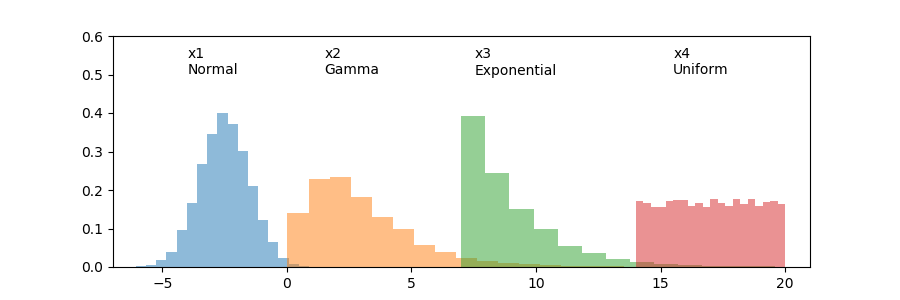

Text(15.5046,0.5,'x4\nUniform')

In [5]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
import numpy as np
import pandas as pd
plt.rcParams['animation.ffmpeg_path'] = '../../tools/ffmpeg/ffmpeg.exe'

%matplotlib notebook


# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))

plt.hist(x1, density=True, bins=20, alpha=0.5)
plt.hist(x2, density=True, bins=20, alpha=0.5)
plt.hist(x3, density=True, bins=20, alpha=0.5)
plt.hist(x4, density=True, bins=20, alpha=0.5)

plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

In [6]:
# descriptive statistics
stats = pd.DataFrame({'normal': x1,
                     'gamma': x2,
                     'exponential': x3,
                     'uniform': x4})

stats.describe()

,exponential,gamma,normal,uniform
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.020546,3.000819,-2.497019,17.004580
std,2.020046,2.145700,1.001973,1.730455
min,7.000023,0.024045,-6.877352,14.001163
25%,7.593083,1.463286,-3.177637,15.520586
50%,8.402001,2.513477,-2.503627,17.019990
75%,9.809164,4.041682,-1.807913,18.509416
max,26.362935,16.921252,1.294677,19.999376


<IPython.core.display.Javascript object>


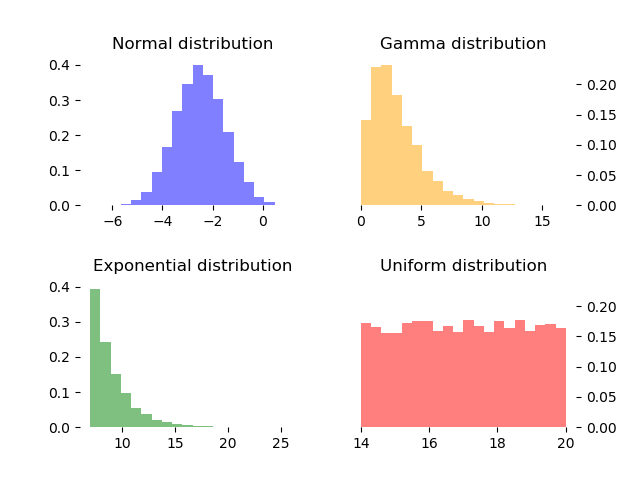

In [7]:
# display the subplots in a grid using gridspec
plt.figure()
gspec = gridspec.GridSpec(2, 2)

# gridspec layout
normal_distribution = plt.subplot(gspec[0, 0])
gamma_distribution = plt.subplot(gspec[0, 1])
uniform_distribution = plt.subplot(gspec[1, 1], sharey = gamma_distribution)
exponential_distribution = plt.subplot(gspec[1, 0], sharey = normal_distribution)

# print plots
normal_distribution.hist(x1, density=True, bins=20, alpha=0.5, color = 'blue')
uniform_distribution.hist(x4, density=True, bins=20, alpha=0.5, color = 'red')
gamma_distribution.hist(x2, density=True, bins=20, alpha=0.5, color = 'orange')
exponential_distribution.hist(x3, density=True, bins=20, alpha=0.5, color = 'green')

# plots tweaking
gamma_distribution.yaxis.tick_right() # y-ticks on the right axis
uniform_distribution.yaxis.tick_right()

normal_distribution.set_title('Normal distribution') # set title for each subplot
uniform_distribution.set_title('Uniform distribution')
gamma_distribution.set_title('Gamma distribution')
exponential_distribution.set_title('Exponential distribution')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5) # spacing between subplots

normal_distribution.spines['top'].set_visible(False) # don't show any borders around the chart
normal_distribution.spines['right'].set_visible(False)
normal_distribution.spines['bottom'].set_visible(False)
normal_distribution.spines['left'].set_visible(False)

uniform_distribution.spines['top'].set_visible(False) # don't show any borders around the chart
uniform_distribution.spines['right'].set_visible(False)
uniform_distribution.spines['bottom'].set_visible(False)
uniform_distribution.spines['left'].set_visible(False)

gamma_distribution.spines['top'].set_visible(False) # don't show any borders around the chart
gamma_distribution.spines['right'].set_visible(False)
gamma_distribution.spines['bottom'].set_visible(False)
gamma_distribution.spines['left'].set_visible(False)

exponential_distribution.spines['top'].set_visible(False) # don't show any borders around the chart
exponential_distribution.spines['right'].set_visible(False)
exponential_distribution.spines['bottom'].set_visible(False)
exponential_distribution.spines['left'].set_visible(False)


<IPython.core.display.Javascript object>


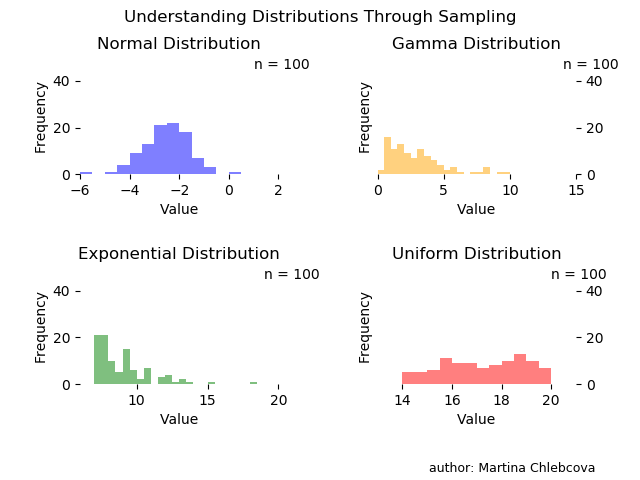

In [44]:
# number of samples
n = 100

# subplots in grid
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
plt.subplots_adjust(left=None, bottom=0.2, right=None, top=None, wspace=0.5, hspace=0.8) # spacing between subplots

# add main title to all subplots
plt.suptitle('Understanding Distributions Through Sampling')

# add footnote
text = '''author: Martina Chlebcova'''
plt.figtext(0.93,0.01, text, fontsize=9, va='bottom', ha='right')

def updateData(curr):
     
    if curr == n:
        simulation.event_source.stop() # stops the simulation after reaching n
         
    # setting the axes
    for ax in (ax1, ax2, ax3, ax4):
        ax.clear() # clears axes after each sample in order not to have n histograms in one plot
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.set_ylabel('Frequency')
        ax.set_xlabel('Value')
        
    # plotting the data        
    ax1.hist(x1[:curr], bins=np.arange(-6, 2, 0.5), alpha=0.5, color = 'blue')
    ax2.hist(x2[:curr], bins=np.arange(0, 15, 0.5), alpha=0.5, color = 'orange')
    ax3.hist(x3[:curr], bins=np.arange(6, 20, 0.5), alpha=0.5, color = 'green')
    ax4.hist(x4[:curr], bins=np.arange(13, 21, 0.5), alpha=0.5, color = 'red')
    
    # specificities for each plot
    ax1.axis([-6,2,0,50])
    ax2.axis([0,15,0,50])
    ax3.axis([6,20,0,50])
    ax4.axis([13,21,0,50])
    
    ax2.yaxis.tick_right() # y-ticks on the right axis
    ax4.yaxis.tick_right()

    
    ax1.set_title('Normal Distribution')
    ax2.set_title('Gamma Distribution')
    ax3.set_title('Exponential Distribution')
    ax4.set_title('Uniform Distribution')
    
    ax1.annotate('n = {}'.format(curr), [1,45])
    ax2.annotate('n = {}'.format(curr), [14,45])
    ax3.annotate('n = {}'.format(curr), [19,45]) 
    ax4.annotate('n = {}'.format(curr), [20,45])


# runs the simulation with 10 ms interval between frames
simulation = animation.FuncAnimation(fig, updateData, interval=1, repeat=False)
simulation.save('UnderstandingDistributionsThroughSampling.mp4',
                writer = 'ffmpeg',
                fps = 10,
                metadata = {
                    'title' : 'Understanding Distributions Through Sampling',
                    'artist' : 'Martina Chlebcova'}
                )

plt.show()